In [1]:
import tensorflow as tf
from skimage import transform
from skimage import data
import matplotlib.pyplot as plt
import os
import numpy as np
from skimage.color import rgb2gray
import random
%matplotlib inline


In [2]:
def load_data(data_dir):
    # Get all subdirectories of data_dir. Each represents a label.
    directories = [d for d in os.listdir(data_dir) 
                   if os.path.isdir(os.path.join(data_dir, d))]
    # Loop through the label directories and collect the data in
    # two lists, labels and images.
    labels = []
    images = []
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f) 
                      for f in os.listdir(label_dir) 
                      if f.endswith(".ppm")]
        for f in file_names:
            images.append(data.imread(f))
            labels.append(int(d))
    return images, labels

ROOT_PATH = "/Users/Praneeth/Downloads/"
train_data_dir = os.path.join(ROOT_PATH, "Training/")
test_data_dir = os.path.join(ROOT_PATH, "Testing/")

images, labels = load_data(train_data_dir)

In [3]:
images_array = np.array(images)
labels_array = np.array(labels)

# Print the `images` dimensions
print(images_array.ndim)

# Print the number of `images`'s elements
print(images_array.size)

# Print the first instance of `images`
print(images_array[0])

# Print the `labels` dimensions
print(labels_array.ndim)

# Print the number of `labels`'s elements
print(labels_array.size)

# Count the number of labels
print(len(set(labels_array)))


1
4575
[[[ 47  52  59]
  [ 35  64  72]
  [ 53 104 112]
  ...
  [ 75  82  60]
  [ 72  77  55]
  [ 68  71  50]]

 [[ 46  51  57]
  [ 38  66  74]
  [ 58 109 115]
  ...
  [ 74  84  62]
  [ 76  84  62]
  [ 76  83  61]]

 [[ 44  50  56]
  [ 44  71  79]
  [ 59 109 115]
  ...
  [ 71  83  61]
  [ 74  84  63]
  [ 75  84  63]]

 ...

 [[120 141 139]
  [119 144 138]
  [114 141 131]
  ...
  [ 33  30  27]
  [ 32  30  28]
  [ 30  30  28]]

 [[133 151 145]
  [124 146 138]
  [111 137 127]
  ...
  [ 31  30  25]
  [ 32  32  27]
  [ 33  33  30]]

 [[139 158 147]
  [124 146 137]
  [107 132 123]
  ...
  [ 31  30  23]
  [ 33  33  27]
  [ 35  36  31]]]
1
4575
62


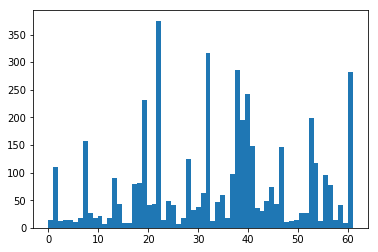

In [4]:
# Import the `pyplot` module
import matplotlib.pyplot as plt 

# Make a histogram with 62 bins of the `labels` data
plt.hist(labels, 62)

# Show the plot
plt.show()

You clearly see that not all types of traffic signs are equally represented in the dataset

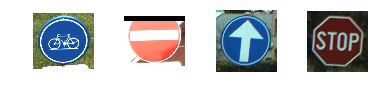

In [5]:
import matplotlib.pyplot as plt

# Determine the (random) indexes of the images that you want to see 
traffic_signs = [300, 2250, 3650, 4000]

# Fill out the subplots with the random images that you defined 
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)

plt.show()

These four images are not of the same size! this is an important observation which you will need to take into 
account when you start working more towards manipulating your data so that you can feed it to the neural network.

Let’s confirm the hypothesis of the differing sizes by printing the shape, the minimum and maximum values of the specific images that you have included into the subplots

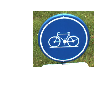

shape: (236, 256, 3), min: 0, max: 255


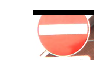

shape: (133, 164, 3), min: 0, max: 255


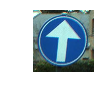

shape: (122, 121, 3), min: 0, max: 255


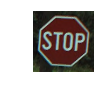

shape: (123, 123, 3), min: 0, max: 215


In [6]:
# Import `matplotlib`
import matplotlib.pyplot as plt

# Determine the (random) indexes of the images
traffic_signs = [300, 2250, 3650, 4000]

# Fill out the subplots with the random images and add shape, min and max values
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images[traffic_signs[i]].shape, 
                                                  images[traffic_signs[i]].min(), 
                                                  images[traffic_signs[i]].max()))


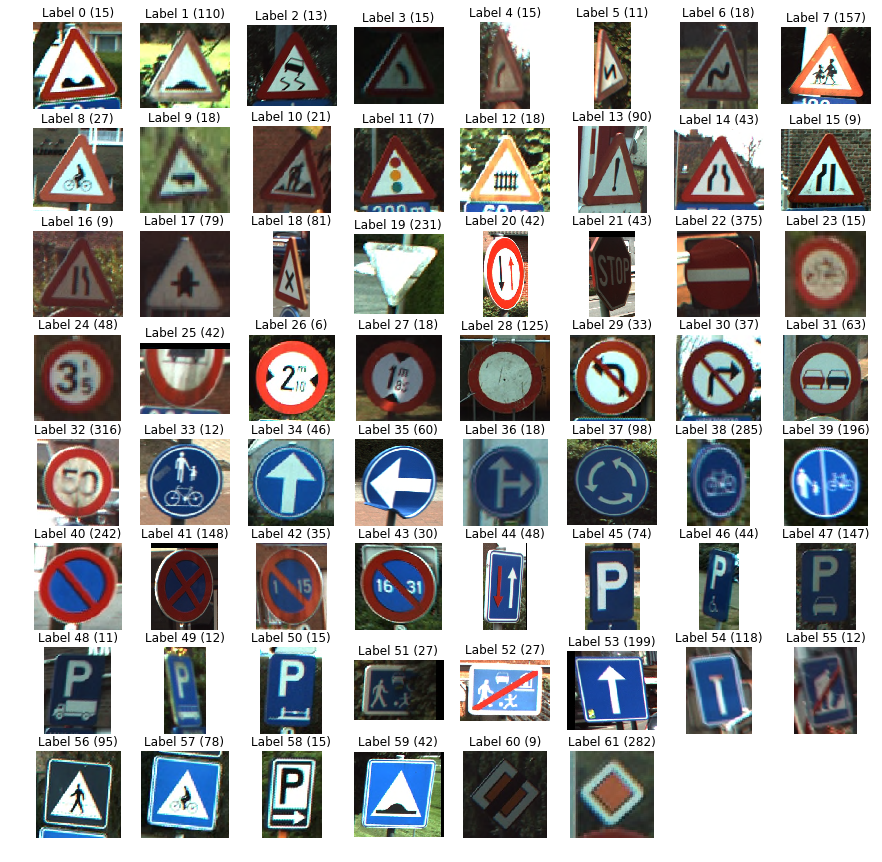

In [7]:
# Import the `pyplot` module as `plt`
import matplotlib.pyplot as plt 

# Get the unique labels 
unique_labels = set(labels)

# Initialize the figure
plt.figure(figsize=(15, 15))

# Set a counter
i = 1

# For each unique label,
for label in unique_labels:
    # You pick the first image for each label
    image = images[labels.index(label)]
    # Define 64 subplots 
    plt.subplot(8, 8, i)
    # Don't include axes
    plt.axis('off')
    # Add a title to each subplot 
    plt.title("Label {0} ({1})".format(label, labels.count(label)))
    # Add 1 to the counter
    i += 1
    # And you plot this first image 
    plt.imshow(image)
    
# Show the plot
plt.show()

As you mostly guessed in the histogram above, there are considerably more traffic signs with labels 22, 32, 38, 
and 61. This hypothesis is now confirmed in this plot: you see that there are 375 instances with label 22, 316 
instances with label 32, 285 instances with label 38 and, lastly, 282 instances with label 61.

# FEATURE EXTRACTION

## Rescaling Images

To tackle the differing image sizes, you’re going to rescale the images; 
You can easily do this with the help of the skimage or Scikit-Image library, which is a
collection of algorithms for image processing.

In [ ]:
# Resize images
images28 = [transform.resize(image, (28, 28)) for image in images]
images28 = np.array(images28)

Note that the images are now four-dimensional: if you convert images28 to an array and if you concatenate the attribute shape to it, you’ll see that the printout tells you that images28’s dimensions are (4575, 28, 28, 3). The images are 784-dimensional (because your images are 28 by 28 pixels).

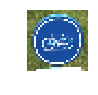

shape: (28, 28, 3), min: 0.05070028011204415, max: 1.0


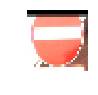

shape: (28, 28, 3), min: 0.0, max: 1.0


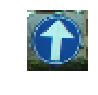

shape: (28, 28, 3), min: 0.027040816326528917, max: 1.0


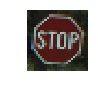

shape: (28, 28, 3), min: 0.04141781712685025, max: 0.8151298019207689


In [12]:
# Import `matplotlib`
import matplotlib.pyplot as plt

# Determine the (random) indexes of the images
traffic_signs = [300, 2250, 3650, 4000]

# Fill out the subplots with the random images and add shape, min and max values
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images28[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images28[traffic_signs[i]].shape, 
                                                  images28[traffic_signs[i]].min(), 
                    
                                                  images28[traffic_signs[i]].max()))


Note that because you rescaled, your min and max values have also changed; They seem to be all in the same ranges now.

## Image Conversion to Rescale

The color in the pictures matters less when we’re trying to answer a classification question. That’s why we’ll also go through the trouble of converting the images to grayscale.

In [13]:
images28 = rgb2gray(np.array(images28))

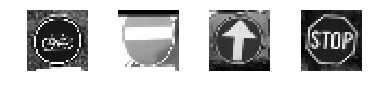

(4575, 28, 28)


In [14]:
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images28[traffic_signs[i]], cmap="gray")
    plt.subplots_adjust(wspace=0.5)
    
plt.show()

print(images28.shape)


# Deep Learning with Tensor Flow

## Modelling the Neural Network

We build up the network. You first start off by flattening the input with the help of the flatten() function, which will give you an array of shape [None, 784] instead of the [None, 28, 28], which is the shape of your grayscale images.

After you have flattened the input, you construct a fully connected layer that generates logits of size [None, 62].

In [15]:
# Initialize placeholders
x = tf.placeholder(dtype = tf.float32, shape = [None, 28, 28])
y = tf.placeholder(dtype = tf.int32, shape = [None])

# Flatten the input data
images_flat = tf.contrib.layers.flatten(x)

# Fully connected layer 
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)

# Define a loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits))

# Define an optimizer 
train_op = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

# Convert logits to label indexes
correct_pred = tf.argmax(logits, 1)

# Define an accuracy metric
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

print("images_flat: ", images_flat)
print("logits: ", logits)
print("loss: ", loss)
print("predicted_labels: ", correct_pred)

images_flat:  Tensor("Flatten/Reshape:0", shape=(?, 784), dtype=float32)
logits:  Tensor("fully_connected/Relu:0", shape=(?, 62), dtype=float32)
loss:  Tensor("Mean:0", shape=(), dtype=float32)
predicted_labels:  Tensor("ArgMax:0", shape=(?,), dtype=int64)


## Running the Neural Network

In [17]:
sess = tf.Session()

sess.run(tf.global_variables_initializer())

for i in range(201):
        print('EPOCH', i)
        _, accuracy_val = sess.run([train_op, accuracy], feed_dict={x: images28, y: labels})
        if i % 10 == 0:
            print("Loss: ", loss)
        print('DONE WITH EPOCH')

EPOCH 0
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 1
DONE WITH EPOCH
EPOCH 2
DONE WITH EPOCH
EPOCH 3
DONE WITH EPOCH
EPOCH 4
DONE WITH EPOCH
EPOCH 5
DONE WITH EPOCH
EPOCH 6
DONE WITH EPOCH
EPOCH 7
DONE WITH EPOCH
EPOCH 8
DONE WITH EPOCH
EPOCH 9
DONE WITH EPOCH
EPOCH 10
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 11
DONE WITH EPOCH
EPOCH 12
DONE WITH EPOCH
EPOCH 13
DONE WITH EPOCH
EPOCH 14
DONE WITH EPOCH
EPOCH 15
DONE WITH EPOCH
EPOCH 16
DONE WITH EPOCH
EPOCH 17
DONE WITH EPOCH
EPOCH 18
DONE WITH EPOCH
EPOCH 19
DONE WITH EPOCH
EPOCH 20
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 21
DONE WITH EPOCH
EPOCH 22
DONE WITH EPOCH
EPOCH 23
DONE WITH EPOCH
EPOCH 24
DONE WITH EPOCH
EPOCH 25
DONE WITH EPOCH
EPOCH 26
DONE WITH EPOCH
EPOCH 27
DONE WITH EPOCH
EPOCH 28
DONE WITH EPOCH
EPOCH 29
DONE WITH EPOCH
EPOCH 30
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 31
DONE WITH EPOCH
EPOCH 32
DONE 

## Evaluating the Neural Network

In [19]:
# Pick 10 random images
sample_indexes = random.sample(range(len(images28)), 10)
sample_images = [images28[i] for i in sample_indexes]
sample_labels = [labels[i] for i in sample_indexes]

# Run the "predicted_labels" op.
predicted = sess.run([correct_pred], feed_dict={x: sample_images})[0]
                        
# Print the real and predicted labels
print(sample_labels)
print(predicted)

[39, 28, 41, 22, 54, 47, 56, 38, 53, 38]
[38 28 22 19 54 17 56 38 53 38]


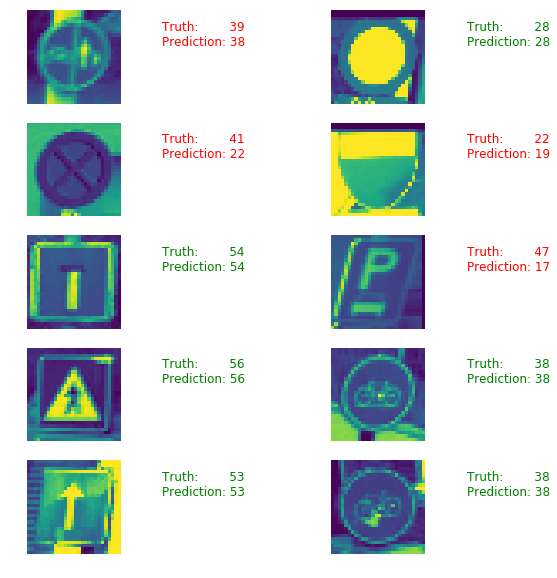

In [20]:
# Display the predictions and the ground truth visually.
fig = plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    prediction = predicted[i]
    plt.subplot(5, 2,1+i)
    plt.axis('off')
    color='green' if truth == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), 
             fontsize=12, color=color)
    plt.imshow(sample_images[i])

plt.show()

In [ ]:
# Load the test data
test_images, test_labels = load_data(test_data_dir)

# Transform the images to 28 by 28 pixels
test_images28 = [transform.resize(image, (28, 28)) for image in test_images]

# Convert to grayscale
from skimage.color import rgb2gray
test_images28 = rgb2gray(np.array(test_images28))

# Run predictions against the full test set.
predicted = sess.run([correct_pred], feed_dict={x: test_images28})[0]

# Calculate correct matches 
match_count = sum([int(y == y_) for y, y_ in zip(test_labels, predicted)])

# Calculate the accuracy
accuracy = match_count / len(test_labels)

# Print the accuracy
print("Accuracy: {:.3f}".format(accuracy))

#### Accuracy: 0.701

In [22]:
sess.close()